<a href="https://colab.research.google.com/github/Fengch365/AlgoDemo/blob/main/KNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN Tutorial

This tutorial is for demonstraing the K-Nearest-Neighbors algorithm in Python. 

In [5]:
# import packages
import numpy as np # package for basic maths
import matplotlib.pyplot as plt # package for ploting

### Data preparation

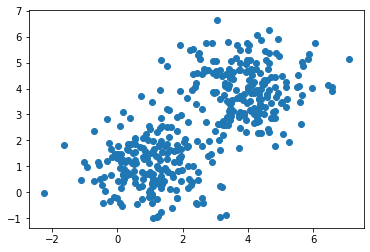

In [124]:
# generate data for demonstration (Gaussian data is used here)
n = 200 # number of data points in each class
np.random.seed(42) # set the random state for reproduction

# 1st Gaussian
mu1 = np.ones(2)
cov1 = np.diag(mu1)
g1 = np.random.multivariate_normal(mu1, cov1, n)

# 2nd Gaussian
mu2 = np.ones(2) * 4
cov2 = np.diag(mu1)
g2 = np.random.multivariate_normal(mu2, cov2, n)

# combine the two sets of data
data = np.concatenate((g1, g2), axis = 0)
label = np.concatenate((np.zeros(n), np.ones(n)))

# visualize our demonstration data
plt.scatter(data[:,0], data[:,1])
plt.show()

### KNN Algorithm

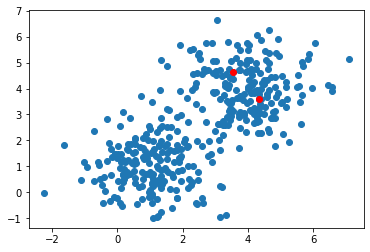

In [125]:
# 1st step: decide the value of k and sample k cluster centers randomly
K = 2 # by inspection
cen = np.random.choice(len(data), K, replace = False)
centers = data[cen]

# visulize the two centers chosen in red
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[cen,0], data[cen,1], c = 'r')
plt.show()

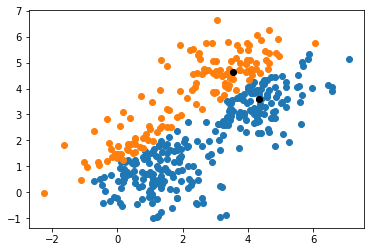

In [126]:
# 2nd step: calculate the distance between data points and the two selected centers and assign class label

def distance(point1, point2):
  x1 = point1[0]
  y1 = point1[1]
  x2 = point2[0]
  y2 = point2[1]

  dis = np.sqrt((x1-x2)**2 + (y1-y2)**2)

  return dis

pred = [] # class label from KNN

for i in range(len(data)): # calculation for all the points
  
  dis = []

  for center in centers:
    dis.append(distance(data[i], center))
  
  pred.append(np.argmin(dis))

# visulize the classification result by KNN
pred = np.array(pred)
for i in range(K):
  ind = np.where(pred == i)
  plt.scatter(data[ind,0], data[ind,1])
plt.scatter(centers[:,0], centers[:,1], c = 'black')
plt.show()

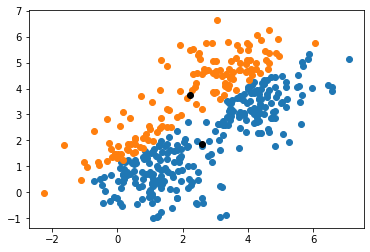

In [127]:
# 3rd step: updata the two centers
for i in range(K):
  ind = np.where(pred == i)
  x_mean = np.mean(data[ind,0])
  y_mean = np.mean(data[ind,1])
  centers[i] = np.array([x_mean, y_mean])

# visualize the two new centers
for i in range(K):
  ind = np.where(pred == i)
  plt.scatter(data[ind,0], data[ind,1])
plt.scatter(centers[:,0], centers[:,1], c = 'black')
plt.show()

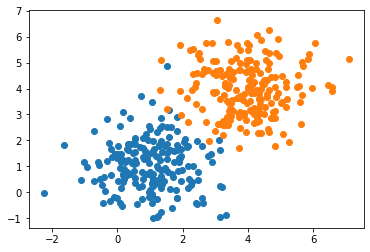

In [128]:
# true clustering result
plt.scatter(g1[:,0], g1[:,1])
plt.scatter(g2[:,0], g2[:,1])
plt.show()